# Interpolación en una imagen usando diferentes metodos.*

Consideremos la imagen del planetario de medellin u otra imagen sobre la cual podamos realizar un ajuste, descargue la imagen de google.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$, equiespaciados en $[a,b]$,  definidos adecuadamente para que los puntos esten (aproximadamente) situados en la superficie del domo,  del edificio que representa la imagen.

3. Representar el polinomio de interpolación de Lagrange, en estos puntos, para aproximar el dibujo.

3. a Emplear diferencias divididas y el polinomio de hermite.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 



5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import lagrange
%matplotlib inline

In [3]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload() #Dar la direccion para cargar el archivo planetarios.png


Saving planetario.jpg to planetario.jpg


In [4]:
!ls 

planetario.jpg	sample_data


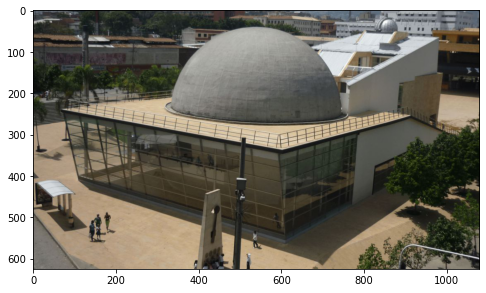

In [52]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)

#plt.plot(x_*625, y_*1080, "ro")
plt.show()



In [6]:
np.shape(imagen)

(625, 1080, 3)

In [7]:
import pandas as pd

In [9]:
#df = pd.DataFrame({"X":x_, "Y": y_})
df = pd.DataFrame()

In [10]:
df.empty

True

In [44]:
# Con estas lineas se ira llenando el data-frame fila por fila 
# dicho data-frame  en el momento esta cargado
# en la ram del  computador local

d={}

for k in ['X','Y']:

      var=input('{}:\n'.format(k))

      d[k]=var

KeyboardInterrupt: ignored

In [42]:
d

{'X': '742.5', 'Y': '246.0'}

In [43]:
# con esta linea se adiciona la fila ingresada anteriormente al data-frame

df=df.append(d,ignore_index=True)

df

X      Y
0  333.0  222.0
1  340.5  183.0
2  364.5  136.5
3  451.5   58.5
4  505.5   43.5
5  559.5   42.0
6  622.5   55.5
7  693.0  114.0
8  739.5  207.0
9  742.5  246.0

In [71]:
# Estas lineas son para cambiar el tipo de las columnas de data-frame (ya que eran string)

df['X']=df.X.astype(float)
df['Y']=df.Y.astype(float)

In [73]:

# Esto es para guardar una copia del data frame en el servidor
# ya que hasta el momento solo esta en la ram 

df.to_csv('DOMO_PLANETARIO.csv',index=False)

In [75]:
# Descargando el data-frame al pc local

files.download("DOMO_PLANETARIO.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# Despues de haberlo descargado lo subo al drive y lo publico para poder trabajar con el archivo
# desde la cuenta propia de drive

path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQw8_k0O3kctE3uwEj7j0BTYsWluj0rUcPsuU3fueKf5T-pxtSgM-3pOn2FwPyMdHTVaXK1u9ILXfGr/pub?output=csv"
df = pd.read_csv(path)

In [78]:
df

X      Y
0  333.0  222.0
1  340.5  183.0
2  364.5  136.5
3  451.5   58.5
4  505.5   43.5
5  559.5   42.0
6  622.5   55.5
7  693.0  114.0
8  739.5  207.0
9  742.5  246.0

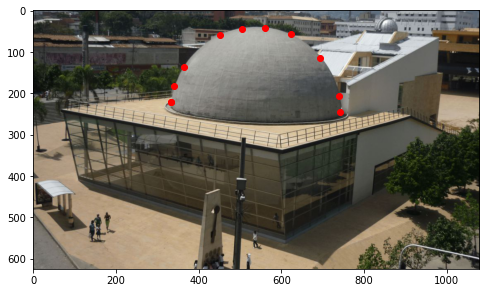

In [79]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(8, 6))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)
plt.plot(df.X, df.Y, "ro")
plt.plot(333, 222, "ro")
plt.show()



In [60]:
np.shape(imagen)

(625, 1080, 3)

In [65]:
type(df.X[2])

str

In [81]:
#Importando librerías y  usando la funcion de lagrange de scipy

from scipy.interpolate import lagrange
poly = lagrange(df.X, df.Y)  

In [82]:
poly

poly1d([ 1.14428870e-18, -4.83737353e-15,  8.82745870e-12, -9.05975503e-09,
        5.69415888e-06, -2.22349328e-03,  5.14327598e-01, -5.89264903e+01,
        8.10558832e+02,  3.16504280e+05])

In [97]:
# Creando un arreglo para la variable independiente
# y posteriormente evaluando en el polinomio de lagrange

x=np.linspace(350, 750, 50)
y=poly(x)

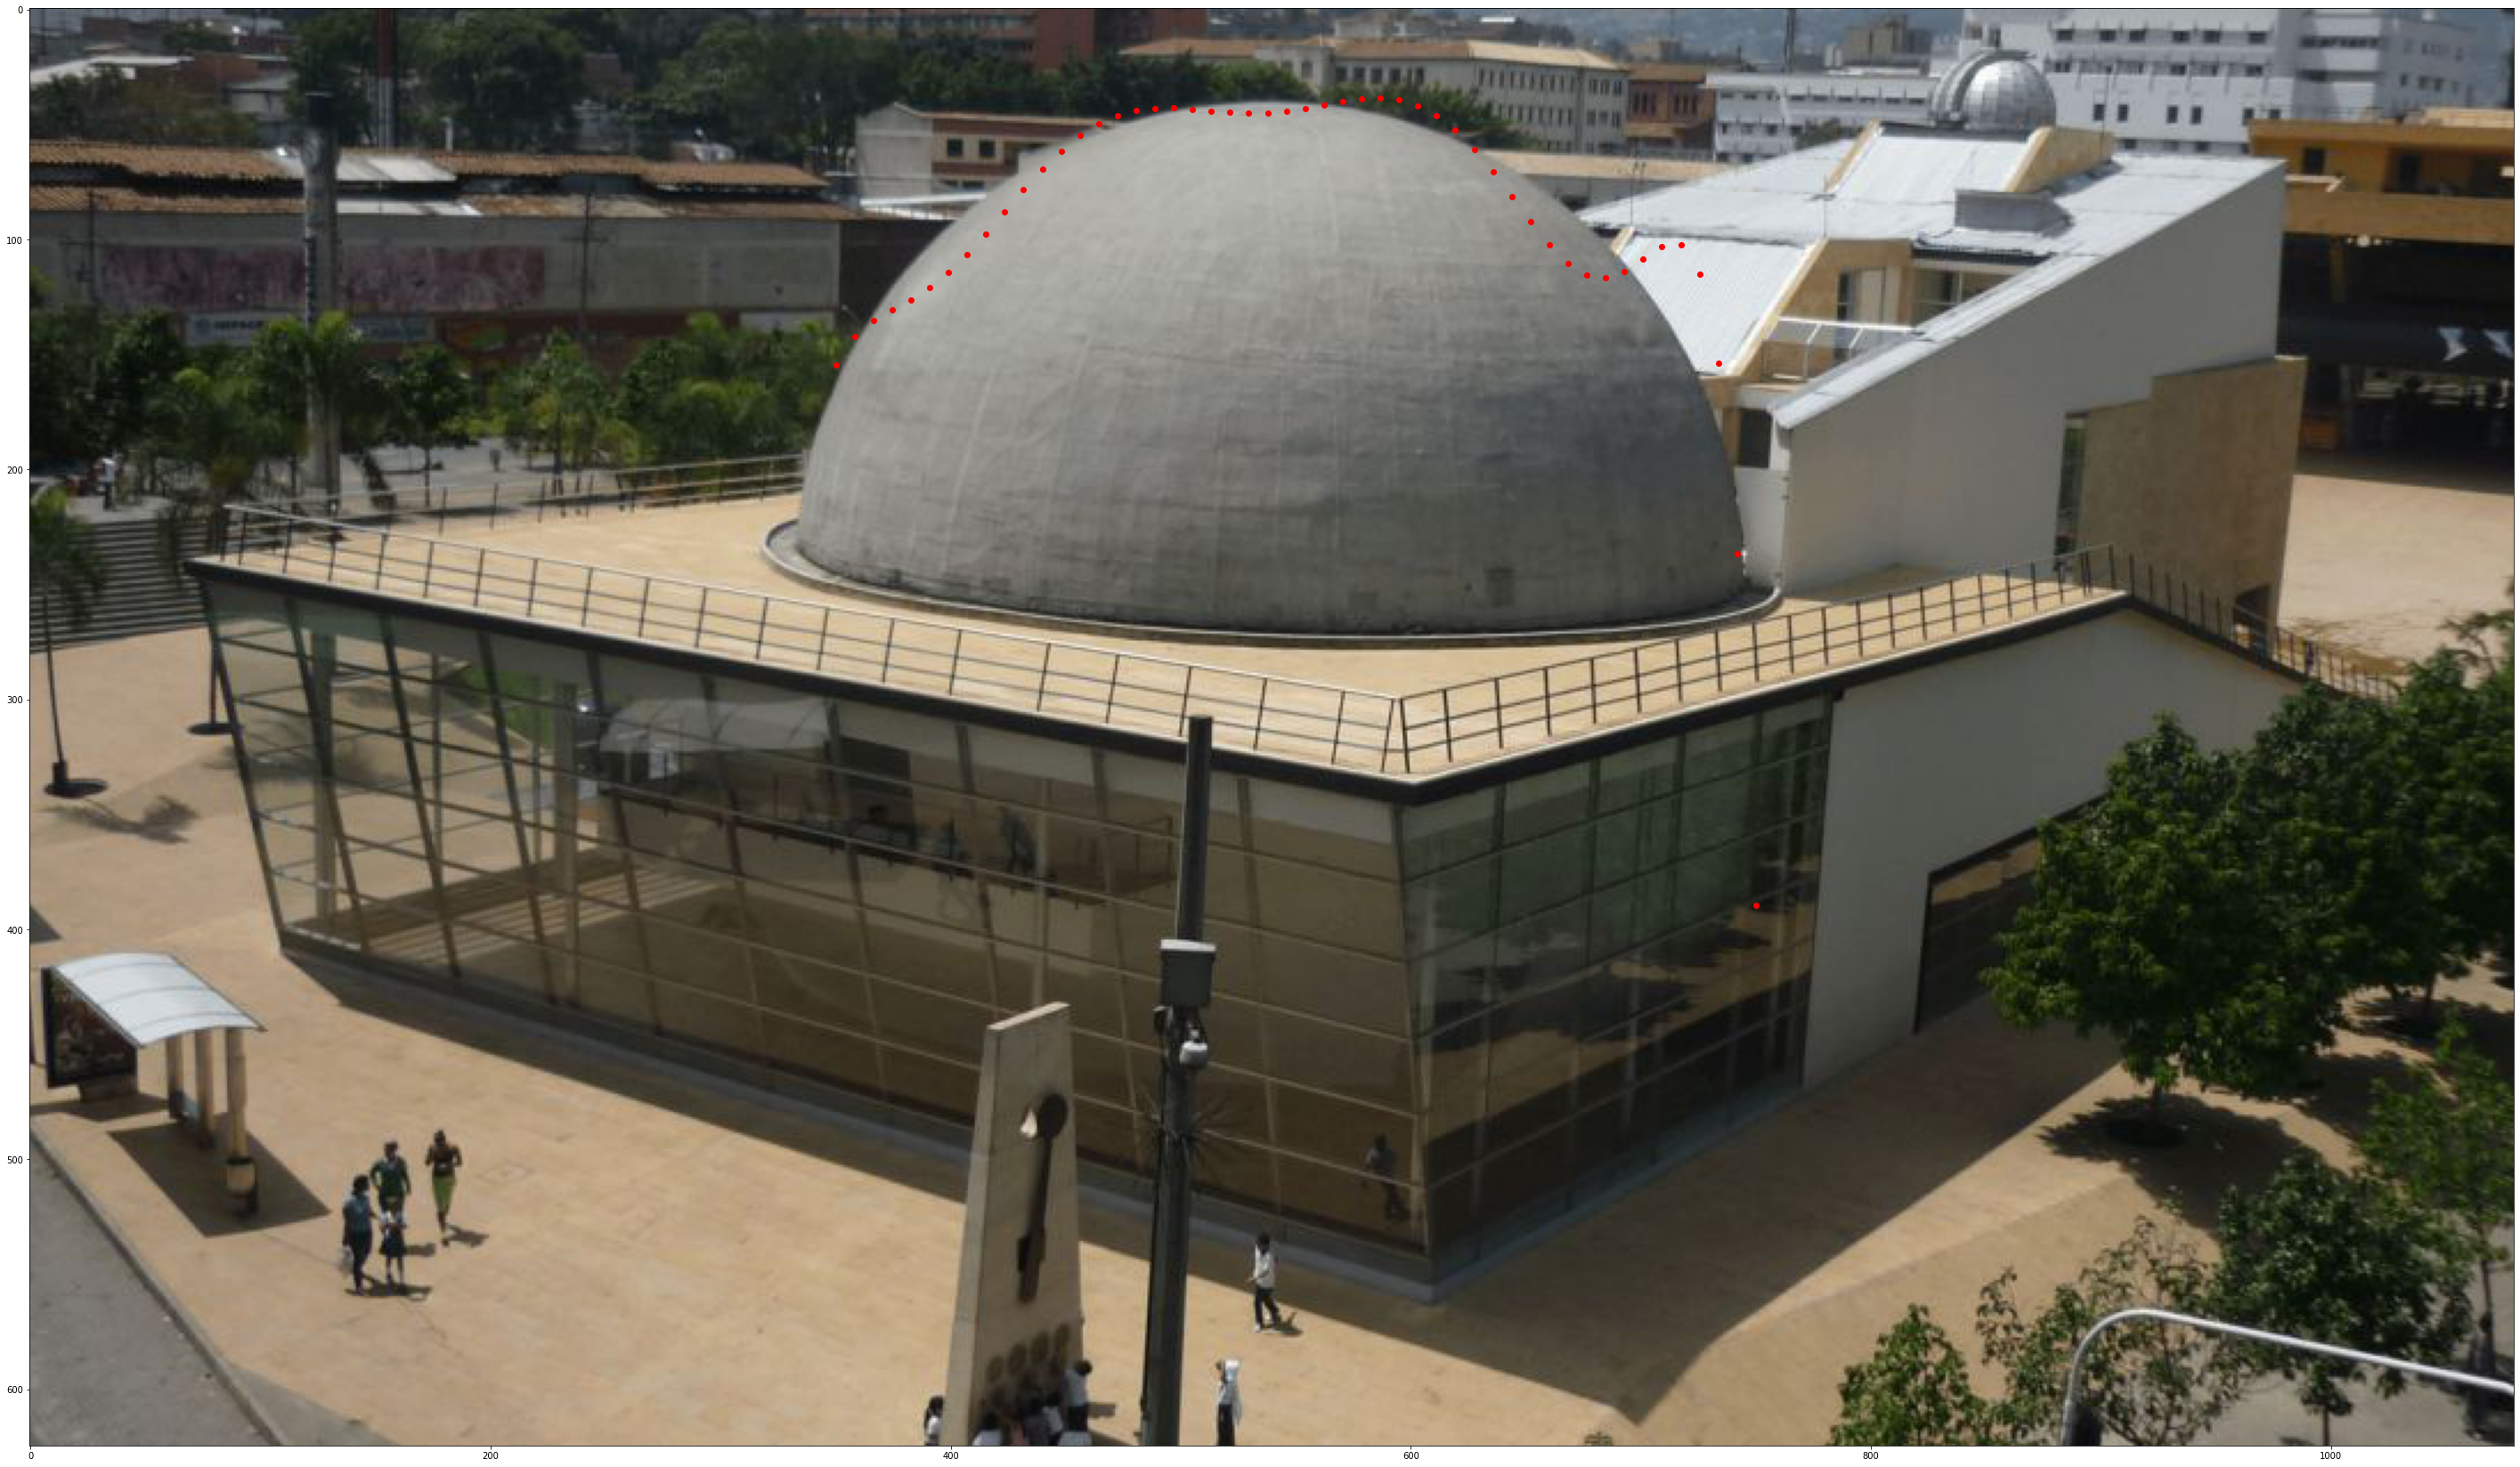

In [98]:
# 1. Carguemos y mostremos la imagen
plt.figure(figsize=(50, 200))
imagen = plt.imread('planetario.jpg') 
plt.imshow(imagen)
plt.plot(x, y, "ro")
plt.show()

